In [2]:
library(ggplot2)
library(dplyr)
library(ggrepel)

'%!in%' <- function(x,y)!('%in%'(x,y))

## Visualizing DEGs using Volcano plots

In [3]:
degs <- readRDS("merged_deg_output_rnabulk_3rdround.rds")

In [4]:
# table(degs$contrast)

In [5]:
temp_1 <- degs[which(degs$contrast == "M_CSF_C5a_vs_M_CSF"),]
temp_2 <- degs[which(degs$contrast == "M_CSF_IL_6_vs_M_CSF"),]
all(temp_1$gene == temp_2$gene)

[1] TRUE

[1] 1192    3

[1] 6147    3

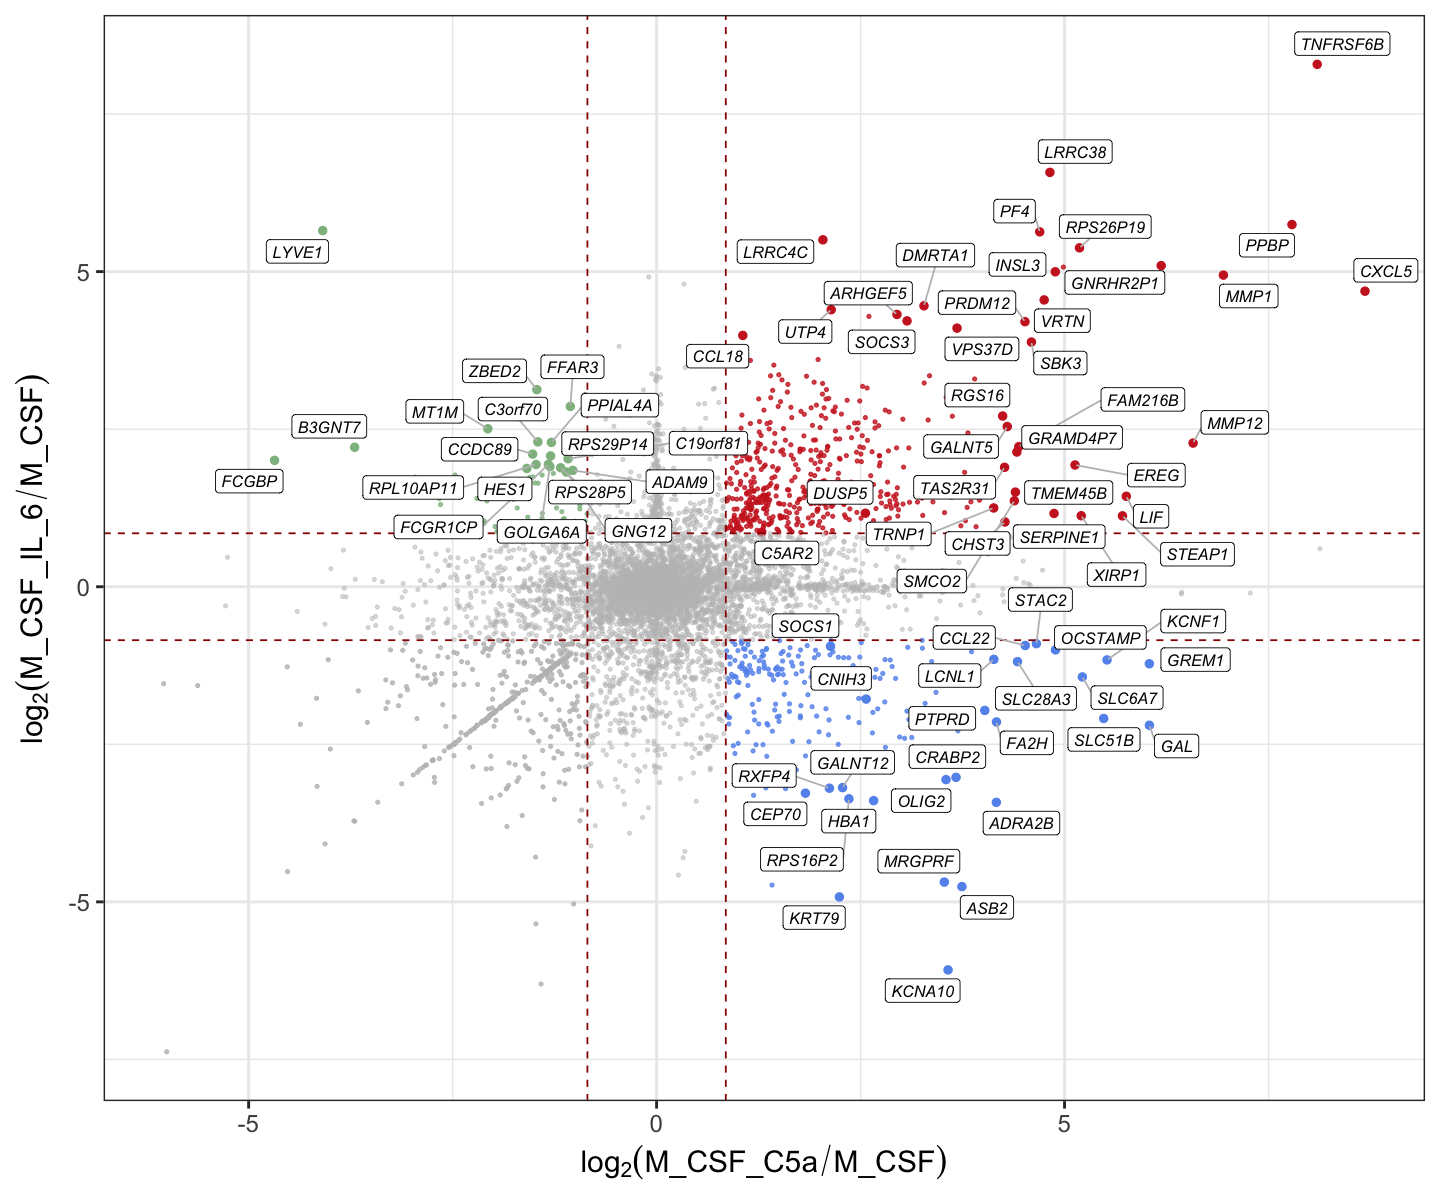

In [6]:
FC <- 1.8 # Fold change threshold
size <- 3.4

temp_combine <- data.frame(
    temp_1_logFC <- temp_1$logFC, 
    temp_2_logFC <- temp_2$logFC,
    Gene <- temp_1$gene
)
colnames(temp_combine) <- c("temp_1_logFC", "temp_2_logFC", "Gene")

sig_up <- temp_combine[abs(temp_combine$temp_1_logFC) > log2(FC) & abs(temp_combine$temp_2_logFC) > log2(FC), ]
colnames(sig_up) <- c("temp_1_logFC", "temp_2_logFC", "Gene")
dim(sig_up)

insig <- temp_combine[abs(temp_combine$temp_1_logFC) < log2(FC) | abs(temp_combine$temp_2_logFC) < log2(FC), ]
colnames(insig) <- c("temp_1_logFC", "temp_2_logFC", "Gene")
dim(insig)

up <- Reduce(union, list(sig_up[sig_up$temp_1_logFC > 4,]$Gene, 
                         sig_up[sig_up$temp_2_logFC > 4,]$Gene, 
                         sig_up[sig_up$temp_2_logFC < -3 & sig_up$temp_1_logFC > FC,]$Gene, 
                         sig_up[sig_up$temp_1_logFC < -1 & sig_up$temp_2_logFC > FC,]$Gene)
            )
# "DUSP5" %in% up
up <- union(up, c( "CCL18", "SOCS1", "NOTCH3", "CNIH3", "CCL22", "DUSP5", "C5AR2", "ITGB3", "CXCL10", "CXCL9", "DUSP5"))
up <- up[-which(up %in% c("LOC100507334", "LOC112694756"))]
sig_up_label <- sig_up[which(sig_up$Gene %in% up), ]

options(repr.plot.height = 10, repr.plot.width = 12)
ggplot(temp_combine, aes(x = temp_1_logFC, y = temp_2_logFC))+   
    geom_point(data = sig_up[which(sig_up$temp_1_logFC > 0 & sig_up$temp_2_logFC > 0),], col = "firebrick3", alpha = 0.8, size = 0.8) +
    geom_point(data = sig_up[which(sig_up$temp_1_logFC > 0 & sig_up$temp_2_logFC < 0),], col = "cornflowerblue", alpha = 0.8, size = 0.8) +
    geom_point(data = sig_up[which(sig_up$temp_1_logFC < 0 & sig_up$temp_2_logFC > 0),], col = "darkseagreen", alpha = 0.8, size = 0.8) +
    geom_point(data = sig_up[which(sig_up$temp_1_logFC < 0 & sig_up$temp_2_logFC < 0),], col = "grey", alpha = 0.8, size = 0.8) +
    geom_point(data = sig_up_label[which(sig_up_label$temp_1_logFC > 0 & sig_up_label$temp_2_logFC > 0),], col = "firebrick3", alpha = 1, size = 2) +
    geom_point(data = sig_up_label[which(sig_up_label$temp_1_logFC > 0 & sig_up_label$temp_2_logFC < 0),], col = "cornflowerblue", alpha = 1, size = 2) +
    geom_point(data = sig_up_label[which(sig_up_label$temp_1_logFC < 0 & sig_up_label$temp_2_logFC > 0),], col = "darkseagreen", alpha = 1, size = 2) +
    geom_point(data = insig, col = "grey", alpha = 0.5, size = 0.8) + 
    geom_vline(xintercept = log2(FC), colour = "#990000", linetype = "dashed") + 
    geom_vline(xintercept = -log2(FC), colour = "#990000", linetype = "dashed") +
    geom_hline(yintercept = log2(FC), colour = "#990000", linetype = "dashed") + 
    geom_hline(yintercept = -log2(FC), colour = "#990000", linetype = "dashed") +
    ggrepel::geom_label_repel(data = sig_up_label, aes(label = Gene), fontface = "italic", size = size, segment.color = "grey", box.padding = 0.3, max.overlaps = 30) +
    theme_bw(base_size = 14) + 
    theme(legend.position = "right", axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15)) + 
    xlab(bquote(log[2](.("M_CSF_C5a") / .("M_CSF")))) + 
    ylab(bquote(log[2](.("M_CSF_IL_6") / .("M_CSF")))) +
    theme_bw(base_size = 18)

ggsave("volcano_comparison_1.pdf", width = 12, height = 10, dpi = 300)